In [9]:

# Graphs


import tensorflow as tf

import os


def get_section_results(file):
    
    ff = os.listdir(file)
    for fff in ff: 
        print('using file', os.path.join(file, fff))
        eval_returns = []
        eval_std = []
        for e in tf.compat.v1.train.summary_iterator(os.path.join(file, fff)):
            for v in e.summary.value:
                if v.tag == 'Eval_AverageReturn':
                    eval_returns.append(v.simple_value)
                elif v.tag == 'Eval_StdReturn': 
                    eval_std.append(v.simple_value)
        return eval_returns, eval_std

In [10]:
data_dir = '/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/'
import numpy as np
exps = {}
for runs in os.listdir(data_dir): 
    # go through each run, get the latest one (assume thats the goat)
    exp_name = runs.split('-')[0]
    from datetime import datetime as dt
    
    datestr = runs.split('-')[1:]
    datestr = ('_').join(datestr)[3:]
    a = dt.strptime(datestr, "%d_%m_%Y_%H_%M_%S")
#     if 'q3' in runs: 
#         print(runs)
    if not exp_name in exps: 
        exps[exp_name] = (runs, a)
    else: 
        date_old = exps[exp_name][1]
        if a > date_old: 
            exps[exp_name] = (runs, a)

In [11]:
for k, v in exps.items(): 
#     print(k, v[0])
    direct = data_dir + v[0] + '/'
    print(direct)
#     !cp -a $direct ./run_logs

/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_todo_MsPacman-v0_15-10-2020_19-37-30/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q1_LunarLander-v3_15-10-2020_21-59-59/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_rip_LunarLander-v3_16-10-2020_11-25-48/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_ q4_100_1_CartPole-v0_19-10-2020_12-09-32/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_ q4_ac_1_1_CartPole-v0_19-10-2020_12-05-34/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q1_MsPacman-v0_15-10-2020_22-00-59/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_ q5_1_100_InvertedPendulum-v2_19-10-2020_12-23-43/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_q2_doubledqn_1_LunarLander-v3_16-10-2020_11-31-48/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_ q5_1_100_HalfCheetah-v2_19-10-2020_12-28-29/
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/d

kkkk hw3_ q5_1_100_HalfCheetah
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_ q5_1_100_HalfCheetah-v2_19-10-2020_12-28-29
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_ q5_1_100_HalfCheetah-v2_19-10-2020_12-28-29/events.out.tfevents.1603135709.mind4
97.01272583007812


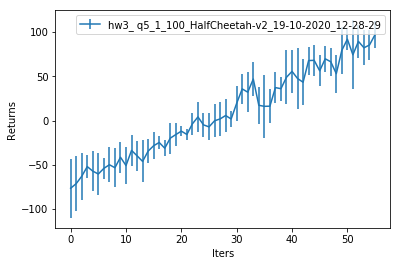

kkkk hw3_ q5_1_100_InvertedPendulum
/userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_ q5_1_100_InvertedPendulum-v2_19-10-2020_12-23-43
using file /userdata/smetzger/cs285/homework_fall2020/hw3/cs285/data/hw3_ q5_1_100_InvertedPendulum-v2_19-10-2020_12-23-43/events.out.tfevents.1603135423.spirit
1000.0


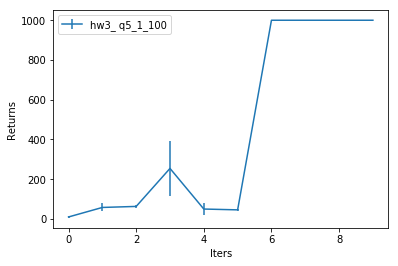

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.clf()
import collections
exps = collections.OrderedDict(sorted(exps.items()))
for k, v in exps.items(): 
    if 'q5' in k:
        print('kkkk', k)
        v = list(v)
#         v[0] = 'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14'
        print(data_dir + v[0])#'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14')
        try:
            returns, stds= get_section_results(data_dir + v[0])
    
            print(np.max(returns))
            plt.errorbar(np.arange(len(returns)), returns, yerr=stds, label = v[0].split('_Inverted')[0])
            plt.xlabel('Iters')
            plt.ylabel('Returns')
            plt.legend()
            plt.savefig('./smlb')
            plt.show()
        except Exception: 
            continue
